In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   #"hessian_percentile" : 95,
                   #"grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                "tau" : (0.995, 0.999),
                #"ewc_lambda" : (200,200)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(2)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-08-07 22:11:03,667] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 3/3 [00:16<00:00,  5.65s/it]
[I 2024-08-07 22:11:28,653] Trial 0 finished with value: 96.33817204301074 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}. Best is trial 0 with value: 96.33817204301074.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|███▎      | 1/3 [00:05<00:10,  5.18s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|██████▋   | 2/3 [00:10<00:05,  5.17s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 3/3 [00:15<00:00,  5.16s/it]
[I 2024-08-07 22:11:52,581] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 3/3 [00:15<00:00,  5.23s/it]
[I 2024-08-07 22:12:16,419] Trial 0 finished with value: 90.91903225806452 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}. Best is trial 0 with value: 90.91903225806452.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|███▎      | 1/3 [00:05<00:10,  5.20s/it]

In and out sizes :
fc1 : in = 784, out = 206
fc2 : in = 206, out = 206
fc3 : in = 206, out = 10


 67%|██████▋   | 2/3 [00:10<00:05,  5.21s/it]

In and out sizes :
fc1 : in = 784, out = 217
fc2 : in = 217, out = 212
fc3 : in = 212, out = 10


100%|██████████| 3/3 [00:15<00:00,  5.26s/it]
[I 2024-08-07 22:12:40,701] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 3/3 [00:15<00:00,  5.19s/it]
[I 2024-08-07 22:13:05,572] Trial 0 finished with value: 86.51494623655913 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}. Best is trial 0 with value: 86.51494623655913.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 221
fc2 : in = 221, out = 224
fc3 : in = 224, out = 10


 33%|███▎      | 1/3 [00:05<00:10,  5.27s/it]

In and out sizes :
fc1 : in = 784, out = 233
fc2 : in = 233, out = 231
fc3 : in = 231, out = 10


 67%|██████▋   | 2/3 [00:10<00:05,  5.22s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 245
fc3 : in = 245, out = 10


100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


KeyboardInterrupt: 

## Visualize results

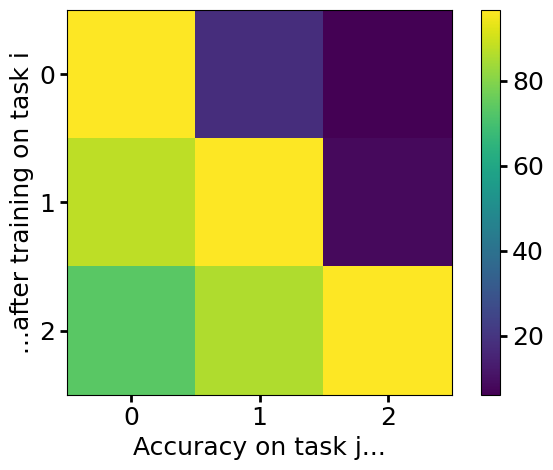

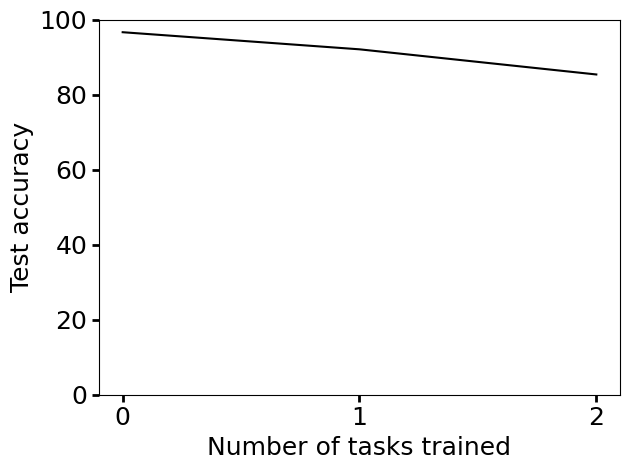

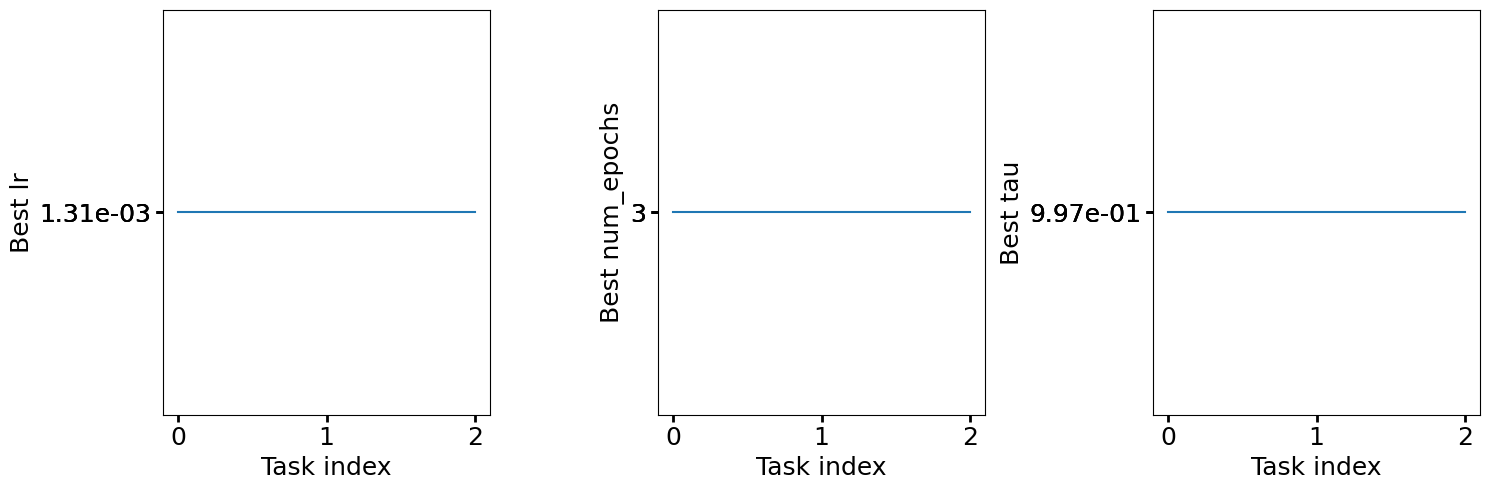

In [ ]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [ ]:
print(best_params_list)

[{'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}, {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}, {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.9970285987528523}]


In [ ]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|███▎      | 1/3 [00:05<00:10,  5.46s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|██████▋   | 2/3 [00:10<00:05,  5.45s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 3/3 [00:16<00:00,  5.45s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|███▎      | 1/3 [00:05<00:11,  5.51s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|██████▋   | 2/3 [00:11<00:05,  5.50s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 3/3 [00:16<00:00,  5.50s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|███▎      | 1/3 [00:05<00:11,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|██████▋   | 2/3 [00:11<00:05,  5.55s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 3/3 [00:16<00:00,  5.54s/it]


## Visualize validation

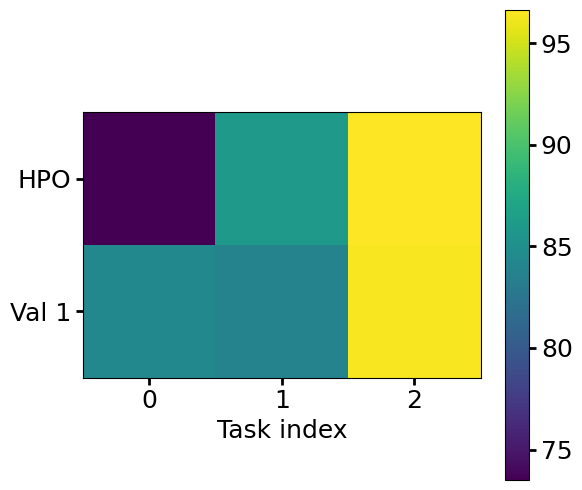

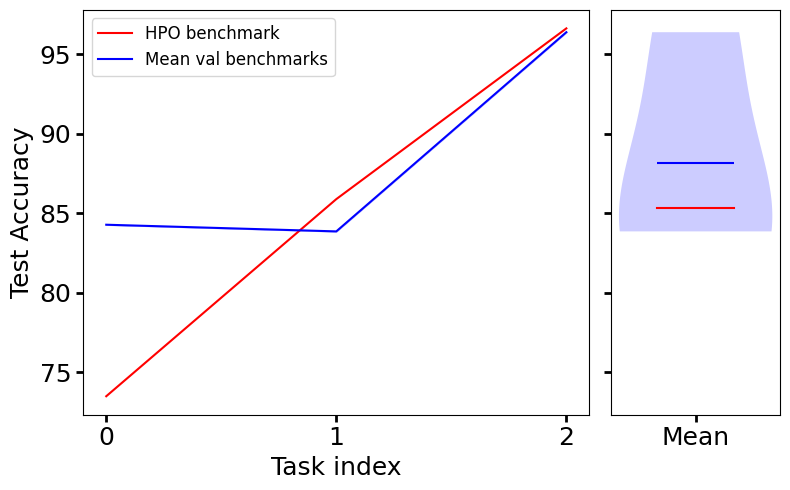

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)